# Question1

## Part (a)

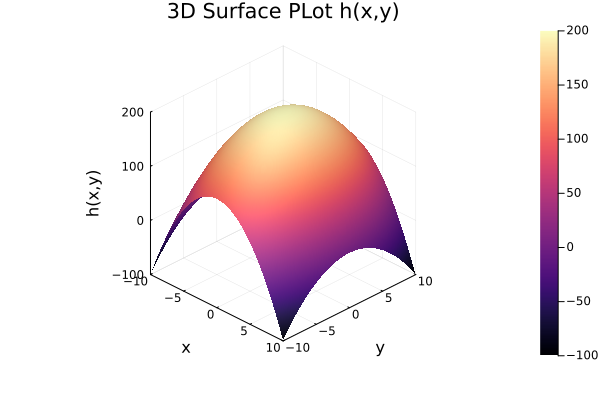

In [1]:
using Plots

g(a,b) = 200 - a^2 - 2b^2

a = -10:0.1:10
b = -10:0.1:10

m = [g(r,s) for r in a, s in b]

surface(a, b, m, title = "3D Surface PLot h(x,y)", xlabel = "x", ylabel = "y", zlabel = "h(x,y)", c = :magma, camera = (45,30))


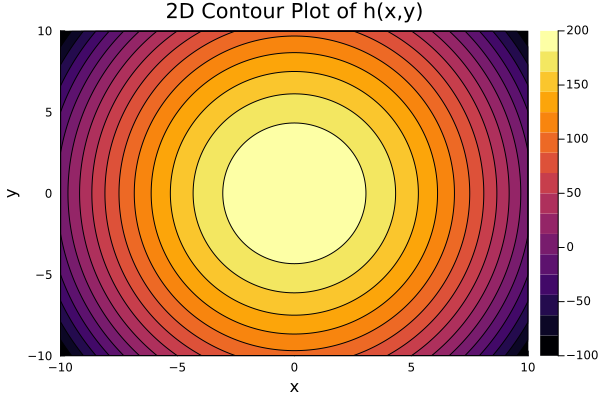

In [2]:
contour(a, b, m, xlabel = "x", ylabel = "y", title = "2D Contour Plot of h(x,y)", fill = true, c = :inferno)


## Part (b)

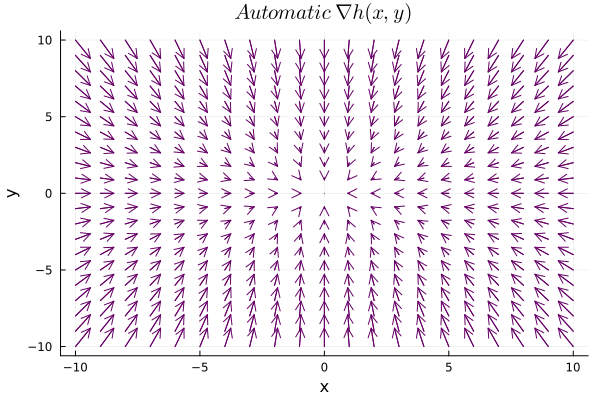

In [6]:
using CalculusWithJulia
using Plots

p = -10:1:10
q = -10:1:10

g(z) = 200 - z[1]^2 - 2*z[2]^2

grad_g(r,s) = gradient(g, [r,s])

P = [i for i in p, j in q]
Q = [j for i in p, j in q]

s1 = [grad_g(i,j)[1] for i in p, j in q]
s2 = [grad_g(i,j)[2] for i in p, j in q]

s1 = s1 * 0.03
s2 = s2 * 0.03

quiver(P, Q, quiver = (s1, s2), title = L"Automatic \; \nabla h(x,y)", xlabel = "x", ylabel = "y", c = :darkrainbow)


## Part(c)

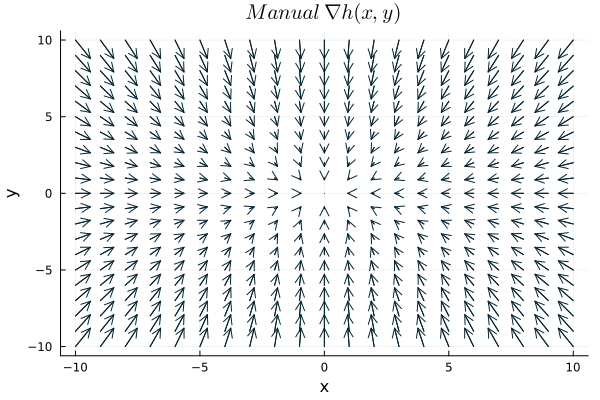

In [7]:
using Symbolics
using LaTeXStrings

@variables a b
manual_grad2(t) = [-2*t[1], -4*t[2]]
manual_grad2([a,b])

a_range = -10:1:10
b_range = -10:1:10

A = [p for p in a_range, q in b_range]
B = [q for p in a_range, q in b_range]

s = [manual_grad2([p,q])[1] for p in a_range, q in b_range]
t = [manual_grad2([p,q])[2] for p in a_range, q in b_range]

s = s*0.03
t = t*0.03

quiver(A, B, quiver = (s,t), title = L"Manual \; \nabla h(x,y)", xlabel = "x", ylabel = "y", c = :thermal)


# Question 2

## Part (a)

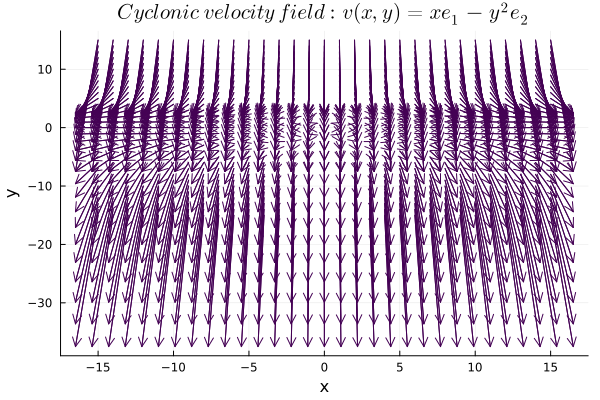

In [8]:
using Symbolics
using LaTeXStrings

@variables a b
vel2(w) = [w[1], -w[2]^2]
vel2([a,b])

a_rng = -15:1:15
b_rng = -15:1:15

A = [p for p in a_rng, q in b_rng]
B = [q for p in a_rng, q in b_rng]

s1 = [vel2([p,q])[1] for p in a_rng, q in b_rng]
s2 = [vel2([p,q])[2] for p in a_rng, q in b_rng]

s1 = s1 * 0.1
s2 = s2 * 0.1

quiver(A, B, quiver = (s1, s2), xlabel = "x", ylabel = "y", title = L"Cyclonic \; velocity \; field: v(x,y) = xe_{1} - y^{2}e_{2}", c = :viridis)


## Part (b)

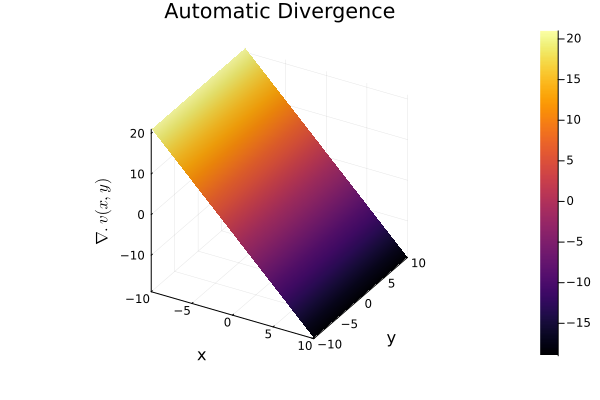

In [9]:
using CalculusWithJulia

vel2(w) = [w[1], -w[2]^2]
vel2([a,b])

div_vel2(p,q) = divergence(vel2, [p,q])

r = -10:1:10
s = -10:1:10

M = [div_vel2(i, j) for i in r, j in s]

surface(r, s, M, xlabel = "x", ylabel = "y", zlabel = L"\nabla.v(x,y)", title = "Automatic Divergence")


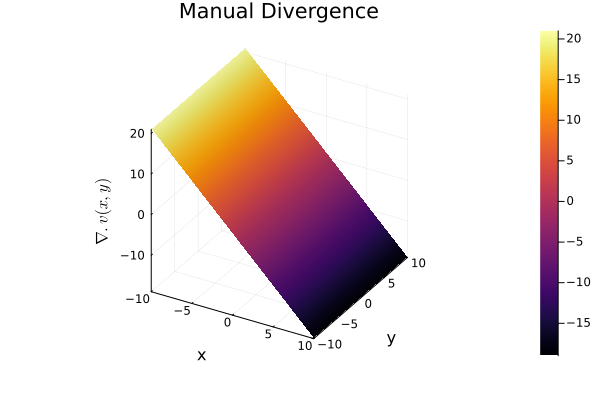

In [10]:
manual_div_vel2(p,q) = 1 - 2*q

N = [manual_div_vel2(i, j) for i in r, j in s]

surface(r, s, N, xlabel = "x", ylabel = "y", zlabel = L"\nabla.v(x,y)", title = "Manual Divergence")


## Part (c)

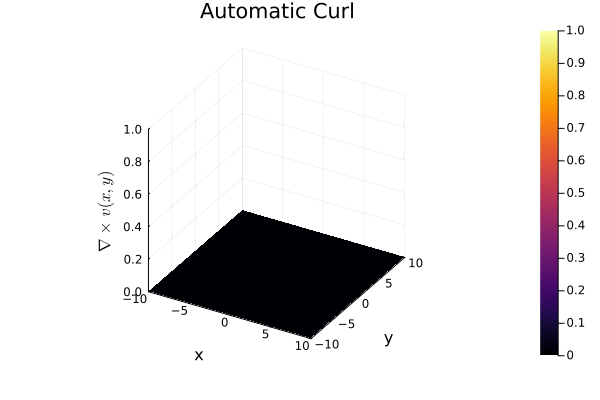

In [11]:
curl_vel2(p,q) = curl(vel2, [p,q])

C = [curl_vel2(i, j) for i in r, j in s]

surface(r, s, C, xlabel = "x", ylabel = "y", zlabel = L"\nabla\times v(x,y)", title = "Automatic Curl")


Manual curl will also be same as curl of given velocity field is 0 in z direction.

# Question 3

## Part (a)

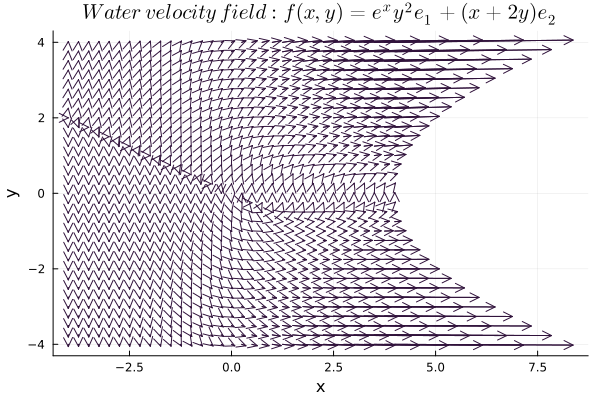

In [12]:
using Symbolics
using CalculusWithJulia
using LaTeXStrings

@variables a b
flow_vel(w) = [exp(w[1]) * w[2]^2 , w[1] + 2*w[2]]
flow_vel([a,b])

p = -4:0.25:4
q = -4:0.25:4

P = [i for i in p, j in q]
Q = [j for i in p, j in q]

s1 = [flow_vel([i,j])[1] for i in p, j in q]
s2 = [flow_vel([i,j])[2] for i in p, j in q]

s1 = s1 * 0.005
s2 = s2 * 0.005

quiver(P, Q, quiver = (s1, s2), xlabel = "x", ylabel = "y", title = L"Water \; velocity \; field: f(x,y) = e^{x}y^{2}e_{1} + (x+2y)e_{2}", c = :turbo)


## Part (b)

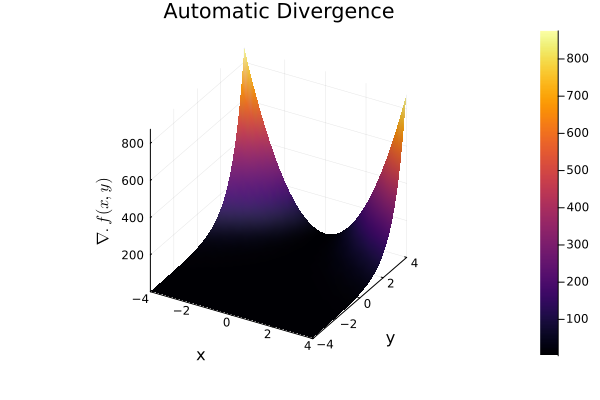

In [13]:
div_water_vel2(r,s) = divergence(flow_vel, [r,s])

D = [div_water_vel2(i, j) for i in p, j in q]

surface(p, q, D, xlabel = "x", ylabel = "y", zlabel = L"\nabla.f(x,y)", title = "Automatic Divergence")


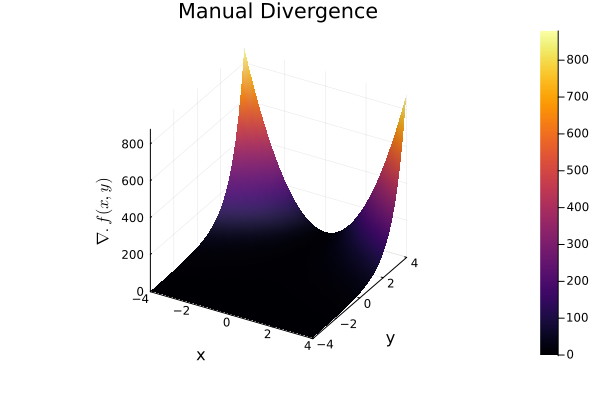

In [14]:
manual_div_water_vel2(r,s) = exp(r) * s^2 + r + 2

Dm = [manual_div_water_vel2(i, j) for i in p, j in q]

surface(p, q, Dm, xlabel = "x", ylabel = "y", zlabel = L"\nabla.f(x,y)", title = "Manual Divergence")


## Part (c)

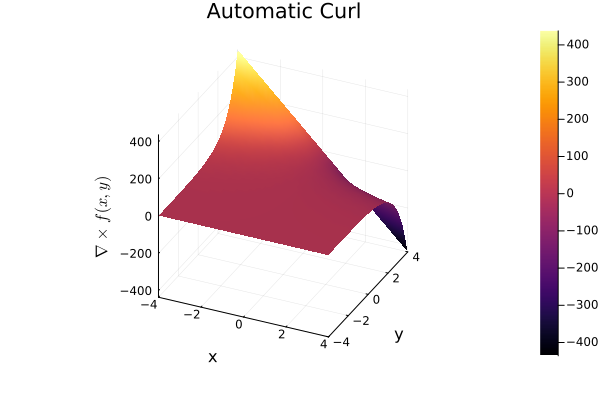

In [15]:
C2 = [curl(flow_vel, [i, j]) for i in p, j in q]

surface(p, q, C2, xlabel = "x", ylabel = "y", zlabel = L"\nabla\times f(x,y)", title = "Automatic Curl", camera = (25,30))


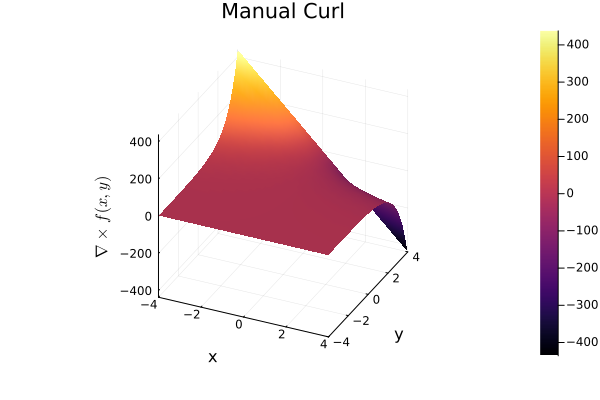

In [16]:
manual_curl2(r,s) = 1 - 2*exp(r)*s

Cm = [manual_curl2(i, j) for i in p, j in q]

surface(p, q, Cm, xlabel = "x", ylabel = "y", zlabel = L"\nabla\times f(x,y)", title = "Manual Curl", camera = (25,30))


# Question 4

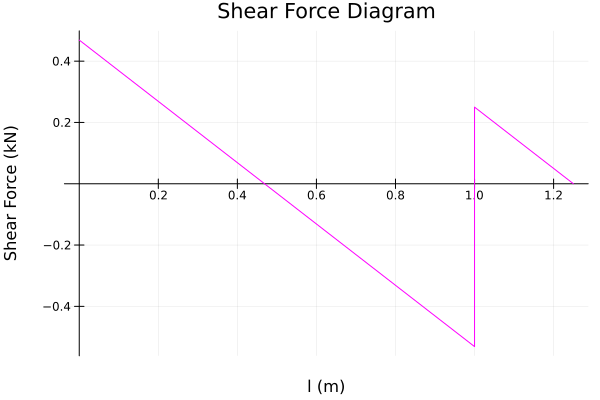

In [19]:
using Plots
gr()

Q = 1
L = 1

function sfd2(Q,L)
    h1 = 0
    v2 = 1.25*0.625*Q*L
    v1 = 1.25*Q*L - v2
    
    u1 = 0:0.01:L
    w1 = v1 .- Q*u1

    u2 = 0:0.01:0.25*L
    w2 = v1 + v2 .- Q*(L .+ u2)
    
    plot([u1; L .+ u2], [w1; w2], framestyle = :origin, title = "Shear Force Diagram", xlabel = "l (m)", ylabel = "Shear Force (kN)", legend = false, c = :magenta)
end

sfd2(Q,L)


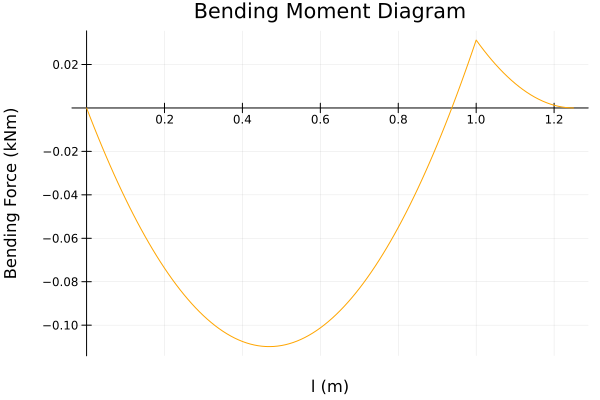

In [20]:
function bmd2(Q, L)
    h1 = 0
    v2 = 1.25*0.625*Q*L
    v1 = 1.25*Q*L - v2

    u1 = 0:0.01:L
    k1 = (v1 .* u1) - (Q .* u1 .* u1 / 2)

    u2 = 0:0.01:0.25*L
    k2 = (v1 .* (L .+ u2)) + (v2 .* u2) - (Q .* (L .+ u2) .* (L .+ u2) / 2)

    plot([u1; L .+ u2], -[k1; k2], framestyle = :origin, title = "Bending Moment Diagram", xlabel = "l (m)", ylabel = "Bending Force (kNm)", legend = false, c = :orange)
end

bmd2(Q, L)


# Question 5

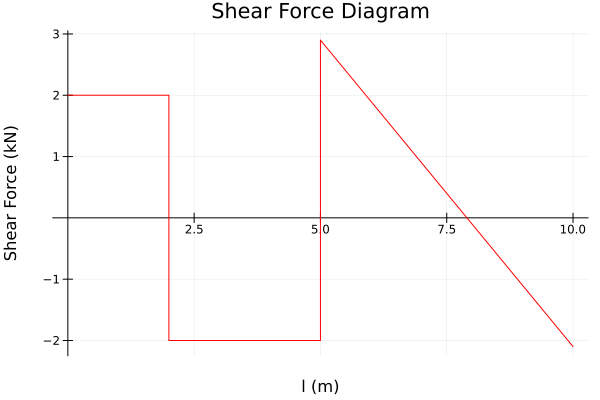

In [21]:
Q = 1
L = 5

function sfd3(Q, L)
    h1 = 0
    w1 = 0.4*Q*L
    w2 = (0.8*Q*1.6*L) + (Q*L/2) - (2*w1)
    w3 = (0.8*Q*L) + (Q*L) - w1 - w2

    u1 = 0:0.01:0.4*L
    s1 = w1 .+ (0*u1)

    u2 = 0:0.01:0.6*L
    s2 = w1 - (0.8*Q*L) .+ (0*u2)

    u3 = 0:0.01:L
    s3 = w1 + w2 - (0.8*Q*L) .- (Q*u3)
    
    plot([u1; (0.4*L) .+ u2; L .+ u3], [s1; s2; s3], framestyle = :origin,
        title = "Shear Force Diagram", xlabel = "l (m)", ylabel = "Shear Force (kN)",
        legend = false, c = :red)
end

sfd3(Q, L)


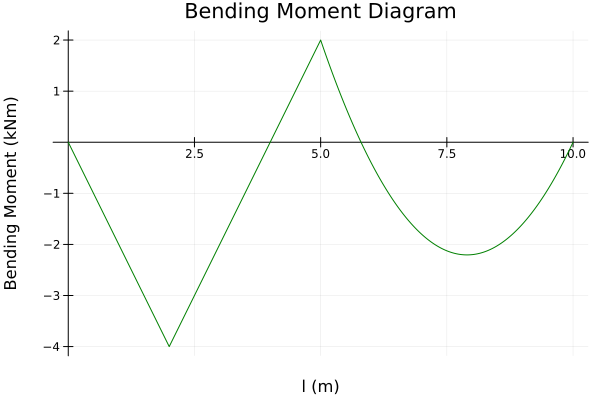

In [22]:
function bmd3(Q, L)
    h1 = 0
    w1 = 0.4*Q*L
    w2 = (0.8*Q*1.6*L) + (Q*L/2) - (2*w1)
    w3 = (0.8*Q*L) + (Q*L) - w1 - w2

    u1 = 0:0.01:(0.4*L)
    k1 = w1 .* u1

    u2 = 0:0.01:(0.6*L)
    k2 = w1 .* (0.4*L .+ u2) - (0.8*Q*L .* u2)

    u3 = 0:0.01:L
    k3 = w1 .* (L .+ u3) + w2 .* u3 - (0.8*Q*L .* (0.6*L .+ u3)) - Q .* u3 .* u3 ./ 2

    plot([u1; (0.4*L) .+ u2; L .+ u3], -[k1; k2; k3], framestyle = :origin,
         title = "Bending Moment Diagram", xlabel = "l (m)", ylabel = "Bending Moment (kNm)",
         legend = false, c = :green)
end

bmd3(Q, L)
